## Exploratory Data Analysis terhadap Data Golden Global Award Tahun 1944 - 2020

Hipotesis :
1. Judul film yang masuk kategori award mempengaruhi kemenangan pada award tersebut
2. Nominator yang terpilih mempengaruhi kemenangan pada award

In [35]:
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from pandas.api.types import CategoricalDtype
import matplotlib.cm as cm

%matplotlib inline
plt.style.use('bmh'); sns.set()

#### 1) Membaca data Golden Globe Awards

In [6]:
data = pd.read_csv('C:/Users/ASUS/golden_globe_awards.csv')
data.head()

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
year_film     7991 non-null int64
year_award    7991 non-null int64
ceremony      7991 non-null int64
category      7991 non-null object
nominee       7991 non-null object
film          6191 non-null object
win           7991 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB
None


### Data Wrangling & Preprocessing

Berdasarkan data di atas, terdapat informasi bahwa terdapat tiga tipe data pada data Golden Globe Awards, diantaranya numerik (integer) untuk kolom tahun rilis film (year_film), tahun film masuk penghargaan (year_award), dan ceremony; kategorik (objek) untuk kolom category, nominator (nominee), dan judul film (film); serta boolean untuk kolom kemenangan (win). Dengan begini tipe data untuk setiap kolom sudah sesuai dengan isinya.

Selain itu, terdapat sebanyak 1800 missing value yang terdapat di kolom film. Missing value ini berasal dari category yang nominee-nya merupakan judul film, sehingga kolom film di sana tidak diinput datanya. Untuk mengatasi missing value ini, saya akan mendrop 1800 baris yang terdapat missing value.

Pada data di atas, kolom year_film dan year_award menunjukkan waktu film dirilis dan waktu film masuk ke ajang penghargaan, sedangkan kolom ceremony menunjukkan keberapa kalinya acara itu dilaksanakan. Selain kolom-kolom tesebut merupakan data kategorik yang berisi teks. Oleh karena itu, tidak ditemukannya suatu data outlier dan noise karena tidak ada data pencilan dalam suatu data kategorik dan semua data di atas tidak menunjukkan tanda-tanda kesalahan ketik atau apapun yang membuat data tersebut menjadi tidak berguna untuk keperluan analisis.

#### 2) Mengatasi Missing Value, dengan cara mendrop baris yang terdapat missing value

In [15]:
award = data.dropna()
print(award.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6191 entries, 0 to 7988
Data columns (total 7 columns):
year_film     6191 non-null int64
year_award    6191 non-null int64
ceremony      6191 non-null int64
category      6191 non-null object
nominee       6191 non-null object
film          6191 non-null object
win           6191 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 344.6+ KB
None


In [16]:
award.head()

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True
5,1943,1944,1,Actor In A Leading Role,Paul Lukas,Watch On The Rhine,True


### Exploratory Data Analysis
#### 3) Basic Statistic
##### a) Menghitung jumlah kemenangan berdasarkan judul film

In [78]:
awards = award.groupby(['film']).sum()

In [79]:
awards.sort_values(['win'], ascending = False)

,year_film,year_award,ceremony,win
film,,,,
Alice,25736,25749,490,7.0
M*A*S*H (TV Show),31635,31651,563,7.0
"Carol Burnett Show, The",37495,37514,597,7.0
La La Land,12096,12102,444,6.0
Sex and The City,36018,36036,1062,5.0
Lawrence Of Arabia,15696,15704,160,5.0
30 Rock,26120,26133,874,5.0
Cheers,43724,43746,1000,5.0
One Flew Over The Cuckoo's Nest,9875,9880,165,5.0


Berdasarkan data di atas, peraih kemenangan tertinggi didapatkan oleh judul film 'Alice', 'MASH (TV Show)', dan 'Carol Burnett Show' sebanyak 7 kemenangan dari berbagai kategori. Ini menunjukkan bahwa judul film dapat mempengaruhi kemenangan pada acara Golden Global Awards. Bisa jadi faktor judul film ini dipengaruhi oleh kualitas alur cerita, para crew dan pemeran, serta pengeksekusian cerita.

##### b) Menghitung jumlah kemenangan berdasarkan nominator

In [80]:
awards = award.groupby(['nominee']).sum()

In [82]:
awards.sort_values(['win'], ascending = False).head()

,year_film,year_award,ceremony,win
nominee,,,,
Meryl Streep,63979,64011,1835,8.0
Alan Alda,31649,31665,577,6.0
Jack Nicholson,33749,33766,735,6.0
Angela Lansbury,29717,29732,587,6.0
Ann-Margret,19792,19802,372,5.0


Berdasarkan data di atas, peraih kemenangan tertinggi didapatkan oleh Meryl Streep sebanyak 8 kemenangan dari berbagai kategori. Ini menunjukkan bahwa seorang pemeran film (nominator) dapat mempengaruhi kemenangan pada acara Golden Global Awards berdasarkan kemampuan berakting atau public speakingnya.

#### 4) Visualisasi
##### a) Jumlah kemenangan berdasarkan judul film

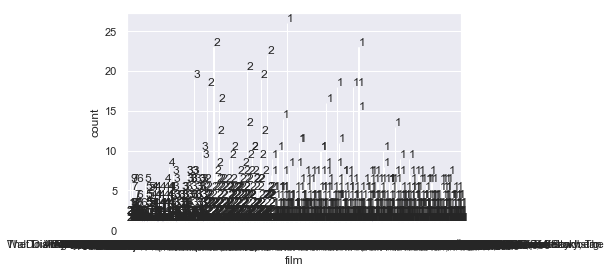

In [83]:
col = 'film'
ax = sns.countplot(x = col, data = award)
for p, label in zip(ax.patches, award[col].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

In [85]:
film = award['film'].value_counts()
print(film)
print(type(film))

L.A. Law                        26
Will & Grace                    23
All In The Family               23
Cheers                          22
Taxi                            20
Dynasty (1981-1989)             19
Carol Burnett Show, The         19
Sex and The City                18
Mary Tyler Moore Show, The      18
Sopranos, The                   18
ER                              18
M*A*S*H (TV Show)               16
Frasier                         16
West Wing, The                  15
Golden Girls, The               14
30 Rock                         13
Alice                           13
Waltons, The                    12
Magnum, P. I.                   12
Roseanne                        11
Fargo                           11
Murphy Brown                    11
Seinfeld                        10
Hart To Hart                    10
Dallas                          10
Nashville                       10
Murder, She Wrote               10
Mad About You                   10
Mannix              

Data di atas menunjukkan bahwa kemenangan pada acara Golden Global Awards dipengaruhi oleh judul film. Judul film di sini bukan berarti seberapa banyak judul film masuk ke dalam banyak kategori, tapi kualitas judul film tersebut yang diperhitungkan. Bisa dilihat bahwa film berjudul 'L.A. Law' merupakan film yang banyak masuk ke dalam kategori namun bukan merupakan film dengan kemenangan paling banyak. Berbeda dengan 'Alice', 'MASH (TV Show)', dan 'Carol Burnett Show' yang tidak banyak masuk ke dalam kategori seperti 'L.A. Law' namun meraih kemenangan terbanyak pada acara Golden Global Awards.

##### b) Jumlah kemenangan berdasarkan nominator

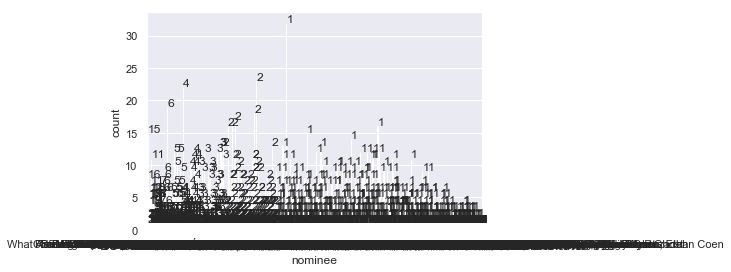

In [87]:
col = 'nominee'
ax = sns.countplot(x = col, data = award)
for p, label in zip(ax.patches, award[col].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

In [88]:
nominee = award['nominee'].value_counts()
print(nominee)
print(type(nominee))

Meryl Streep                                                                   32
John Williams                                                                  23
Jack Lemmon                                                                    22
Shirley MacLaine                                                               19
Al Pacino                                                                      18
Jack Nicholson                                                                 17
Helen Mirren                                                                   16
Alan Alda                                                                      16
Carol Burnett                                                                  16
Angela Lansbury                                                                15
Jessica Lange                                                                  15
Nicole Kidman                                                                  14
Steven Spielberg

Data di atas menunjukkan bahwa semakin banyak nominator masuk ke dalam banyak kategori berbeda, maka semakin besar peluang kemenangannya. Hal ini dilihat dari nominator Meryl Streep yang memenangkan penghargaan terbanyak sebanyak 8 kali dan menjadi satu-satunya yang masuk ke dalam 32 kategori berbeda dalam Golden Global Awards.

### Kesimpulan

Berdasarkan EDA yang dilakukan, hipotesis pertama saya mengenai jumlah kemenangan berdasarkan judul film terbukti benar. Bisa dilihat dari basic statistic dan visualisasi yang telah dilakukan. Serta hipotesis kedua saya mengenai jumlah kemenangan berdasarkan nominator pun terbukti benar. Faktor yang dapat mempengaruhi suatu film dapat meraih penghargaan dapat dilihat dari faktor kualitas cerita, para crew dan pemeran, serta pengeksekusian cerita, sedangkan faktor yang dapat memengaruhi seorang nominator meraih penghargaan dilihat dari kemampuan berakting atau public speakingnya yang baik.